# Data Wrangling

## Introduction:

Real-world data rarely come clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. We will document our wrangling efforts, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

The purpose and goal of this project are to create a trustworthy and interesting analysis and Visualization based on the wrangled data.

# The Data We Have
* Enhanced Twitter Archive
* Additional Data via the Twitter API
* Image Predictions File


# Steps
* Data wrangling, which consists of:
*Gathering data
*Assessing data
*Cleaning data
*Storing, analyzing, and visualizing our wrangled data.

# What is Data Wrangling?

The data wrangling process begins with data collection from various sources, followed by an assessment of data quality, and then by cleaning the data to create a dataset that can be used for exploratory data analysis.

### 1- Data Gathering
In this first part of the wrangling process, we will collect the needed data. 

1-Import CSV for WeRateDogs Twitter archive using the provided Twitter-archive-enhanced.csv file.

2-Programmatically download the image predictions.tsv file through the Requests library.

3-Download data JSON file called tweet_json.txt.

In [1]:
#To start the step of preprossing the dataset is neccessary to import some useful Python libraries.
import pandas as pd
import numpy as np
import requests 
import re
import json
import os 
import tweepy
from tweepy import OAuthHandler
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
from IPython.display import HTML, display

#### Twitter archive csv file

In [2]:
# reading Twitter archive csv file:
twitter_archive = pd.read_csv(r'/Users/reem/Desktop/twitter-archive-enhanced.csv')
# view the first 3 rows in twitter_archive:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Tweet image predictions tsv file

In [3]:
# Downloading programmatically the tweet image predictions tsv file:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    #reading tweet image predictions tsv file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
# view the first 3 rows in image_predictions data: 
image_predictions.head(3)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### JSON file

In [4]:
data_tweet = pd.read_json(r'/Users/reem/Desktop/tweet-json.txt',lines=True)
# view the first 3 rows 
data_tweet.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Gathering Summary
I have completed the first step of data wrangling. I Gathered data from multiple sources and formats. Up to this point, the gathering is done.

### 2-Data Assessing 

Assessing is the second step in the data wrangling process:
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues assessing: this requirement in this project Identify quality issues and tidiness issues you can assess data for Quality: issues with content. Low-quality data is also known as dirty data. Tidiness: issues with a structure that prevents easy analysis. Untidy data is also known as messy data.

###### Assessing Data | twitter_archive Dataset

In [5]:
#use info method that shows a summary of the twitter_archive dataset, 
#like number of observations, columns, variable type
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
# Looking at a randome sample from the dataset
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
226,848690551926992896,NaN,NaN,2017-04-03 00:16:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in animals other than dogs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848690551...,12,10,None,None,None,None,None
1066,740699697422163968,NaN,NaN,2016-06-09 00:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He only mowed half the yard. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740699697...,8,10,Chip,None,None,None,None
1576,687460506001633280,NaN,NaN,2016-01-14 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kramer. He's a Picasso Tortellini. Tie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687460506...,10,10,Kramer,None,None,None,None
511,811985624773361665,NaN,NaN,2016-12-22 17:23:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ted. He accidentally opened the f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811985624...,11,10,Ted,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None


In [7]:
#Check if there is any duplicated values
twitter_archive.duplicated().sum() ## no duplicated values

0

In [8]:
#Cheek if there is null value in all columns
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
# View descriptive statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# Getting the number of unique values in each column
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [11]:
# count the unique rating_numerator value 
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
# count the unique rating_numerator value 
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
# count the unique rating_denominator value
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

##### Assessing Data | image_predictions Dataset:

In [14]:
#use info method that shows a summary of the image_predictions dataset, 
#like number of observations, columns, variable type
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# Looking at a randome sample from the dataset
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
902,700029284593901568,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,West_Highland_white_terrier,0.726571,True,Maltese_dog,0.176828,True,Dandie_Dinmont,0.070134,True
334,672169685991993344,https://pbs.twimg.com/media/CVQGv-vUwAEUjCj.jpg,1,cocker_spaniel,0.991011,True,Sussex_spaniel,0.004032,True,miniature_poodle,0.001276,True
588,679111216690831360,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,kelpie,0.189423,True,beagle,0.121988,True,basset,0.121171,True
558,677698403548192770,https://pbs.twimg.com/media/CWerGmOXAAAm6NY.jpg,1,Shih-Tzu,0.916645,True,Lhasa,0.057883,True,Pekinese,0.020126,True
663,682662431982772225,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,1,beagle,0.413824,True,Cardigan,0.263553,True,basset,0.167618,True


In [16]:
#Check if there is any duplicated values
image_predictions.duplicated().sum() ## no duplicated values

0

In [17]:
#Cheek if there is null value in all columns
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
# View descriptive statistics
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
#count the unique p1 value
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [20]:
#count the unique p2 value
image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [21]:
#count the unique p3 value
image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [22]:
# Getting the rows that their p1_dog, p2_dog and p3_dog happens to be true at the same time
image_predictions.query('p1_dog== True and p2_dog==True and p3_dog== True')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [23]:
# Checking the image of the tweet_id 749981277374128128
image_predictions.query('tweet_id == 666033412701032449')['jpg_url']

2    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
Name: jpg_url, dtype: object

In [24]:
# Diplay the image
display(HTML('<img src="https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg" />'))

##### Assessing Data | data_tweet

In [25]:
#useful method is info that shows a summary of the Tweet_JSON dataset, 
#like number of observations, columns, variable type and the total memory usage
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [26]:
# Looking at a randome sample from the dataset
data_tweet.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1702,2015-12-26 23:15:17+00:00,680889648562991104,680889648562991104,This is Cheesy. It's her birthday. She's patie...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 680889641415872512, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1945,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
700,2016-10-12 03:50:17+00:00,786051337297522688,786051337297522688,13/10 for breakdancing puppo @shibbnbot,False,"[0, 39]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.727430e+17,...,1614,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
1889,2015-12-10 01:37:23+00:00,674764817387900928,674764817387900928,These two pups are masters of camouflage. Very...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674764810110820352, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,852,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1827,2015-12-14 03:08:46+00:00,676237365392908289,676237365392908288,Say hello to Winston. He has no respect for th...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676237351492960256, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1335,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
306,2017-02-26 02:57:52+00:00,835685285446955009,835685285446955008,RT @dog_rates: This is Rory. He's got an inter...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Oct 14 16:13:10 +0000 2016...,NaN,NaN,NaN


In [27]:
#Cheek if there is null value in all columns
data_tweet.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [28]:
data_tweet['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Summary Assement all dataset :

The second step in the data wrangling process is complete. In assessing the gathered datasets, we identified multiple quality and tidiness issues. 

##### Quality:
Issues in validity, completeness, accuracy and consistency i.e. issues in the content.

* 1-twitter_archive dataset:

1-Null values recorded as None and NaN(missing values) 
2- tweet_id type will change tweet_id data type to string 
3-convert timestamp to be DateTime and rename the column into tweet_date 
4-We have some columns that contain unnecessary data delete unneeded column 


* 2- image_predictions dataset:

1-tweet_id should be string type 
2-The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters. 
3- Change the underscores to spaces in the columns (p1, p2 and p3).
4- Delete The columns that will not be used in the analyses.


* 3- data_tweet:

1- id column should be named 'tweet_id' as the others data have
2-'tweet_id' dtype should be string , 'sourse' change data type to category
3- Drop some columns that contain unnecessary data. 
4-Source mixed html tag,Rewrite the tweet source, from iphone..etc. 


##### Tidiness
Issues in structure.

* 1- twitter_archive dataset:
Tidiness: 
The 4 different columns doggo, floofer, pupper and puppo, combine in one columns represent stages_of_dogs"


* 3- data_tweet:
Merge twitter_archive_copy ,data_tweet_copy and image_predictions_copy to df_merge dataframe


### 3- Cleaning Data

After I have assessed the gathered data, I will fix the quality and tidiness issues. This is the third and final step in the data wrangling process.
The following three steps are applied to each assessment point so that it can be cleaned. 
There are three stages :
* 1- Define: which states what I am going to do. 
* 2- Code: The issue is fixed programmatically here. 
* 3- Test: This is where I ensure that we have cleaned the point properly.

In [29]:
# Making copies of our datasets
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
data_tweet_copy = data_tweet.copy()

#### Cleaning Data | twitter_archive Dataset

In [30]:
# read the top 3 of twitter_archive_copy
twitter_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


## Quality Issues:
##### 1- Defin
Incorrected datatypes on tweet-id and timestamp tweet_id, timestamp


##### 2- Code

In [31]:
#tweet_id type is int64, I will change tweet_id data type to string
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

In [32]:
#convert timestamp data type to datetime and rename the column into tweet_date
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy['timestamp'])
twitter_archive_copy.rename(columns={"timestamp":'tweet_date'},inplace=True)

##### 3-Test

In [33]:
print (twitter_archive_copy['tweet_id'].dtypes)
print (twitter_archive_copy['tweet_date'].dtypes)

object
datetime64[ns, UTC]


In [34]:
# test change of timestamp columns to tweet_data
twitter_archive_copy.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


##### 1- Defin

 Delete The columns that will not be used in the analyses.

##### 2- Code

In [35]:
twitter_archive_copy.drop(['in_reply_to_status_id', 
                           'in_reply_to_user_id',
                           'retweeted_status_id', 
                           'retweeted_status_user_id', 'source',
                           'retweeted_status_timestamp', 'expanded_urls',
                           'rating_numerator','rating_denominator'], 
                          axis=1, inplace=True)

##### 3-Test

In [36]:
twitter_archive_copy.head(4)

,tweet_id,tweet_date,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None


### Tidiness Isuue
##### 1- Defin
The 4 different columns (doggo, floofer, pupper and puppo)will combine in one columns represent stages_of_dogs.


##### 2- Code:

In [37]:
# Create a new colum call'stages_of_dogs' combain of 4 of doggo, floofer, pupper and puppo.
twitter_archive_copy['stages_of_dogs'] = twitter_archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [38]:
# Drop doggo, floofer, pupper, and puppo columns
twitter_archive_copy= twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### 3- Test:

In [39]:
twitter_archive_copy['stages_of_dogs'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stages_of_dogs, dtype: int64

#### Cleaning Data | image_predictions dataset:

In [40]:
# read the top 3 of image_predictions copy:
image_predictions_copy.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


## Quality Issues:
##### 1- Defin

tweet_idf should be string type

##### 2- Code:

In [41]:
#tweet_id I will chanage tweet_id data type to string
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype('str')

##### 3-Test:

In [42]:
print(image_predictions_copy['tweet_id'].dtype)

object


##### 1- Defin:
Change the underscores to spaces in the columns (p1, p2 and p3).

##### 2-Code:

In [43]:
#replace '_' with space
for breed in ['p1', 'p2', 'p3']:
    image_predictions_copy[breed] = image_predictions_copy[breed].str.replace('_',' ')

##### 3-Test:

In [44]:
image_predictions_copy[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


##### 1- Defin:
Change the dog breeds in the columns (p1, p2 and p3) to Uppercase letters

##### 2- Code:

In [45]:
## Create Function to change the name to upper case:
def CapitalizeBreeds(Breeds):
    Name = Breeds.split(' ')
    Name = [names.capitalize() for names in Name]
    return ' '.join(Name)

#capitalize the first letter of each breed name
for breed in ['p1', 'p2', 'p3']:
    image_predictions_copy[breed] = image_predictions_copy[breed].apply(CapitalizeBreeds)

##### 3- Test:

In [46]:
image_predictions_copy[['p1', 'p2', 'p3']].head(5)

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


##### 1- Defin:
Delete The columns that will not be used in the analyses.

##### 2- Code:

In [47]:
image_predictions_copy.drop(['img_num'], axis =1, inplace= True)

##### 3- Test:

In [48]:
image_predictions_copy.head(5)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Cleaning Data |data_tweet dataset

In [49]:
#read the top 3 of data_tweet_copy
data_tweet_copy.head(4)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Quality Issues:
##### 1- Defin

Change the name of the column id_sts to tweet_id

##### 2-Code:

In [50]:
#ranme id _str columns to tweet_id
data_tweet_copy.rename(columns={'id_str':'tweet_id'},inplace=True)

##### 3- Test:

In [51]:
data_tweet_copy.head(4)

,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


##### 1-Defin:
'tweet_id' dtype should be string , 'sourse' change data type to category

##### 2-Code:

In [52]:
#change tweet_id data type:
data_tweet_copy['tweet_id'] = data_tweet_copy['tweet_id'].astype('str')

In [53]:
#change  source data dtype:
data_tweet_copy['source'] = data_tweet_copy['source'].astype('category')

##### 3-Test:

In [54]:
print(data_tweet_copy['tweet_id'].dtype)
print(data_tweet_copy['source'].dtype)

object
category


##### 1- Defin
Drop some columns that contain unnecessary data.

##### 2- Code:

In [55]:
#drop columns do not need:
data_tweet_copy.drop(columns=['created_at','full_text','truncated','display_text_range','entities',
                              'extended_entities','in_reply_to_status_id','in_reply_to_status_id_str',
                              'in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name',
                              'user','geo','coordinates','favorited','retweeted','possibly_sensitive',
                              'possibly_sensitive_appealable','lang','retweeted_status','quoted_status_id',
                              'quoted_status_id_str','quoted_status','place','contributors','is_quote_status'],
                     inplace=True)

##### 3-Test:

In [56]:
data_tweet_copy.head(5)

,id,tweet_id,source,retweet_count,favorite_count
0,892420643555336193,892420643555336192,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467
1,892177421306343426,892177421306343424,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819
2,891815181378084864,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461
3,891689557279858688,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908
4,891327558926688256,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048


##### 1- Defin
source mixed html tag,Rewrite the tweet source, from iphone..etc.

##### 2- Code:

In [57]:
data_tweet_copy['source'] = data_tweet_copy["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', ' ')

##### 3- Test:

In [58]:
data_tweet_copy['source'].value_counts()

 Twitter for iPhone      2219
 Vine - Make a Scene       91
 Twitter Web Client        33
 TweetDeck                 11
Name: source, dtype: int64

In [59]:
data_tweet_copy.sample(4)

,id,tweet_id,source,retweet_count,favorite_count
947,752309394570878976,752309394570878976,Twitter for iPhone,18963,0
1564,687841446767013888,687841446767013888,Vine - Make a Scene,2872,6009
345,831926988323639298,831926988323639296,Twitter for iPhone,39,369
1186,718454725339934721,718454725339934720,Twitter for iPhone,1685,5320


# Merge all dataset

Merge all 3 dataset: 1- twitter_archive_copy ,2- data_tweet_copy and 3-image_predictions_copy to df_merge dataframe

In [60]:
df_merge= pd.merge(twitter_archive_copy,data_tweet_copy , on='tweet_id' , how ='left')
df_merge.head(5)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,8.918152e+17,Twitter for iPhone,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,8.916896e+17,Twitter for iPhone,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,8.913276e+17,Twitter for iPhone,9774.0,41048.0


In [61]:
df_merge = pd.merge(df_merge,image_predictions_copy,on='tweet_id',how='left')
df_merge.head(5)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,8.918152e+17,Twitter for iPhone,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,8.916896e+17,Twitter for iPhone,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,8.913276e+17,Twitter for iPhone,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English Springer,0.225770,True,German Short-haired Pointer,0.175219,True


In [62]:
#Create a copy 
df_merge_C = df_merge.copy()

In [63]:
#shows a summary of the dataset
df_merge_C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2356 non-null   object             
 1   tweet_date      2356 non-null   datetime64[ns, UTC]
 2   text            2356 non-null   object             
 3   name            2356 non-null   object             
 4   stages_of_dogs  399 non-null    object             
 5   id              1518 non-null   float64            
 6   source          1518 non-null   object             
 7   retweet_count   1518 non-null   float64            
 8   favorite_count  1518 non-null   float64            
 9   jpg_url         2075 non-null   object             
 10  p1              2075 non-null   object             
 11  p1_conf         2075 non-null   float64            
 12  p1_dog          2075 non-null   object             
 13  p2              2075 non-null   o

In [64]:
#cheack duplication:
df_merge_C.tweet_id.duplicated().sum()

0

In [65]:
df_merge_C.sample(4)

,tweet_id,tweet_date,text,name,stages_of_dogs,id,source,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
140,865006731092295680,2017-05-18 00:50:50+00:00,This is Nelly. He really hopes you like his Ha...,Nelly,NaN,8.650067e+17,Twitter for iPhone,8209.0,29063.0,https://pbs.twimg.com/media/DAEfCFXUIAA1uqj.jpg,Pembroke,0.989882,True,Cardigan,0.009906,True,Basenji,0.000135,True
365,829011960981237760,2017-02-07 17:00:28+00:00,This is Dexter. He was reunited with his mom y...,Dexter,NaN,8.290120e+17,Twitter for iPhone,18627.0,58302.0,https://pbs.twimg.com/media/C4E99ygWcAAQpPs.jpg,Boxer,0.312221,True,Dalmatian,0.244040,True,Conch,0.130273,False
727,782305867769217024,2016-10-01 19:47:08+00:00,This is Sampson. He just graduated. Ready to b...,Sampson,doggo,7.823059e+17,Twitter for iPhone,6470.0,18630.0,https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg,Briard,0.504427,True,Soft-coated Wheaten Terrier,0.390678,True,Lhasa,0.034596,True
706,785533386513321988,2016-10-10 17:32:08+00:00,This is Dallas. Her tongue is ridiculous. 11/1...,Dallas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CubGchjXEAA6gpw.jpg,Miniature Pinscher,0.436023,True,Black-and-tan Coonhound,0.258049,True,Rottweiler,0.145231,True


In [66]:
#View descriptive statistics
df_merge_C.describe()

,id,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,1.518000e+03,1518.000000,1518.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.386500e+17,2971.322134,7752.137681,0.594548,1.345886e-01,6.032417e-02
std,6.699942e+16,4867.362390,10966.529752,0.271174,1.006657e-01,5.090593e-02
min,6.660293e+17,2.000000,0.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.767853e+17,607.250000,1405.250000,0.364412,5.388625e-02,1.622240e-02
50%,7.145456e+17,1389.000000,3558.500000,0.588230,1.181810e-01,4.944380e-02
75%,7.904331e+17,3493.500000,9629.000000,0.843855,1.955655e-01,9.180755e-02
max,8.918152e+17,56625.000000,107015.000000,1.000000,4.880140e-01,2.734190e-01


# Storing data

In [67]:
# Save twitter dataframe to a CSV file
df_merge_C.to_csv('twitter_archive_master_.csv',index=False)

# Analyzing and Visualizing Data

### Questions:

* 1- Are there any relationships between retweets and likes?
* 2- What is the most popular source?
* 3- What is the most stage for dogs?
* 4- What is the average monthly number of tweets?

##### 1- Are there any relationships between retweets and likes?

Text(0.5, 1.0, 'Retweets and Likes Scatter Plot')

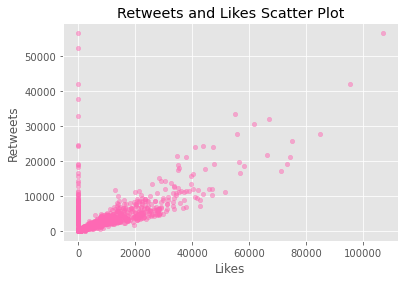

In [68]:
plt.style.use("ggplot")
df_merge_C.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5,color = 'hotpink')
#set up the title and lables of the plot.
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')

#### The correlation between Retweets and Likes is positive.

#####  2- What is the most popular source?

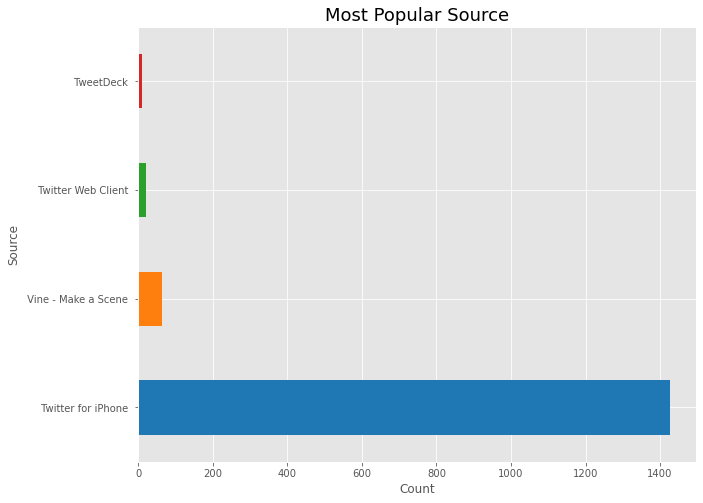

In [69]:

cmap = plt.cm.tab10
colors = cmap(np.arange(len(df_merge_C)) % cmap.N)

source_df = df_merge_C['source'].value_counts()
source_df.plot(kind='barh', figsize=(10,8),grid=True, fontsize =10, color=colors)
#set up the title and lables of the plot.
plt.title('Most Popular Source',fontsize = 18)
plt.xlabel('Count',fontsize = 12)
plt.ylabel('Source',fontsize = 12)
 
plt.show()

#### The most popular source is 'Twitter for iPhone'.

#### 3- What is the most stage for dogs?

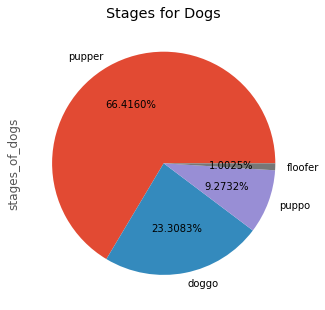

In [70]:

df_merge_C['stages_of_dogs'].value_counts().plot.pie(figsize=(5,6), autopct='%.4f%%')
#set up the title.
plt.title('Stages for Dogs')
plt.show()

#### The Pupper is the most stage of dogs.

#### 4- What is the average monthly number of tweets?

In [71]:
Month_df= df_merge_C['tweet_id'].groupby([df_merge['tweet_date'].dt.month, df_merge['tweet_date'].dt.year]).count()
Month_df.head()

tweet_date  tweet_date
1           2016          194
            2017           94
2           2016          125
            2017           88
3           2016          137
Name: tweet_id, dtype: int64

Text(0, 0.5, 'Number of Tweets')

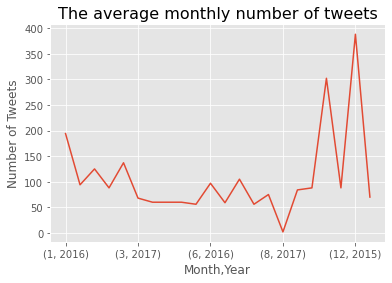

In [72]:
Month_df.plot.line()
plt.title('The average monthly number of tweets', size=16)
plt.xlabel('Month,Year')
plt.ylabel('Number of Tweets')

##### Tweets dropped over time, with spikes in inactivity during the early months of 2016(Jan), 2016(Mar), and generally declining from there.